<a href="https://colab.research.google.com/github/Adchayakumar/Mini_project_03/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: read the csv with delemiter of ";" and na_values='?'

import pandas as pd

df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';', na_values='?')

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
df.isnull().sum()/len(df)*100

,0
Date,0.000000
Time,0.000000
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844


<Axes: >

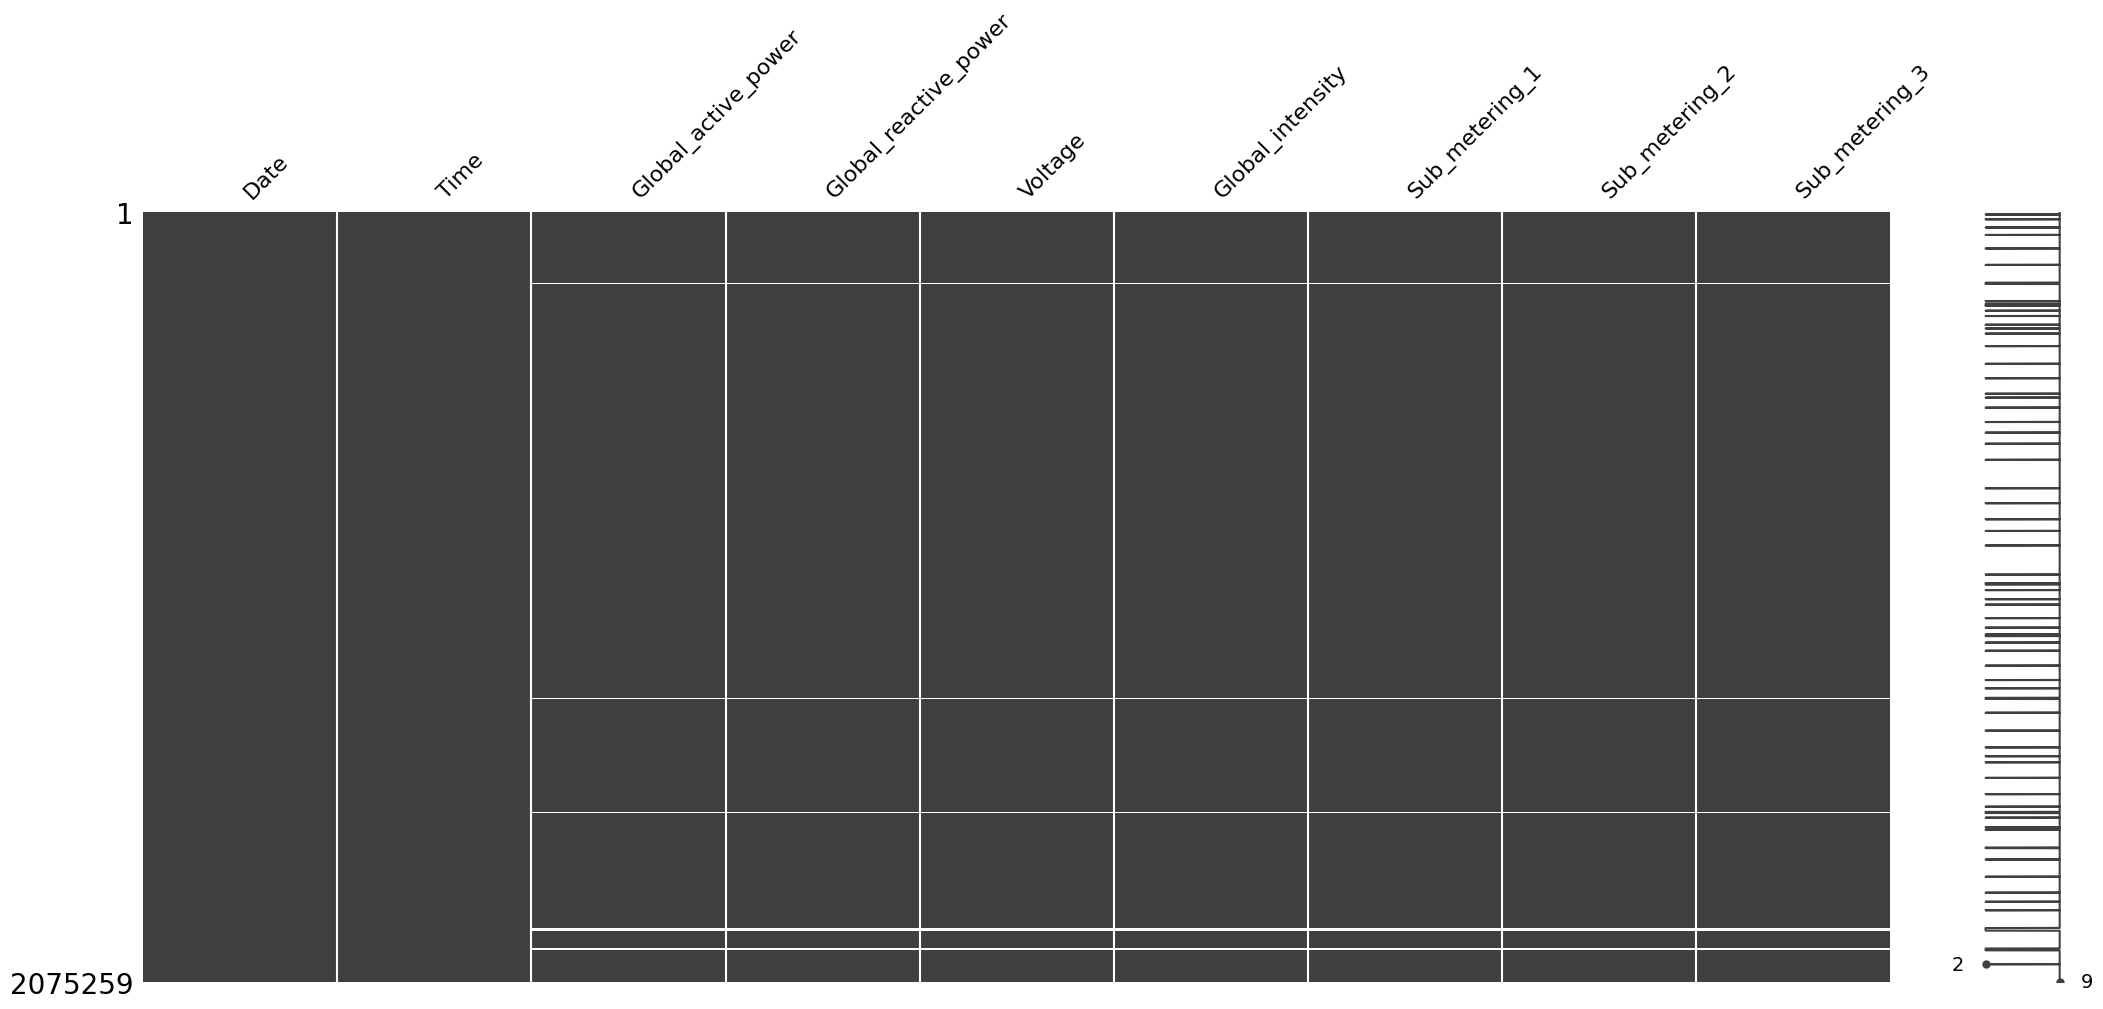

In [ ]:
import missingno as mno
mno.matrix(df)

<Axes: >

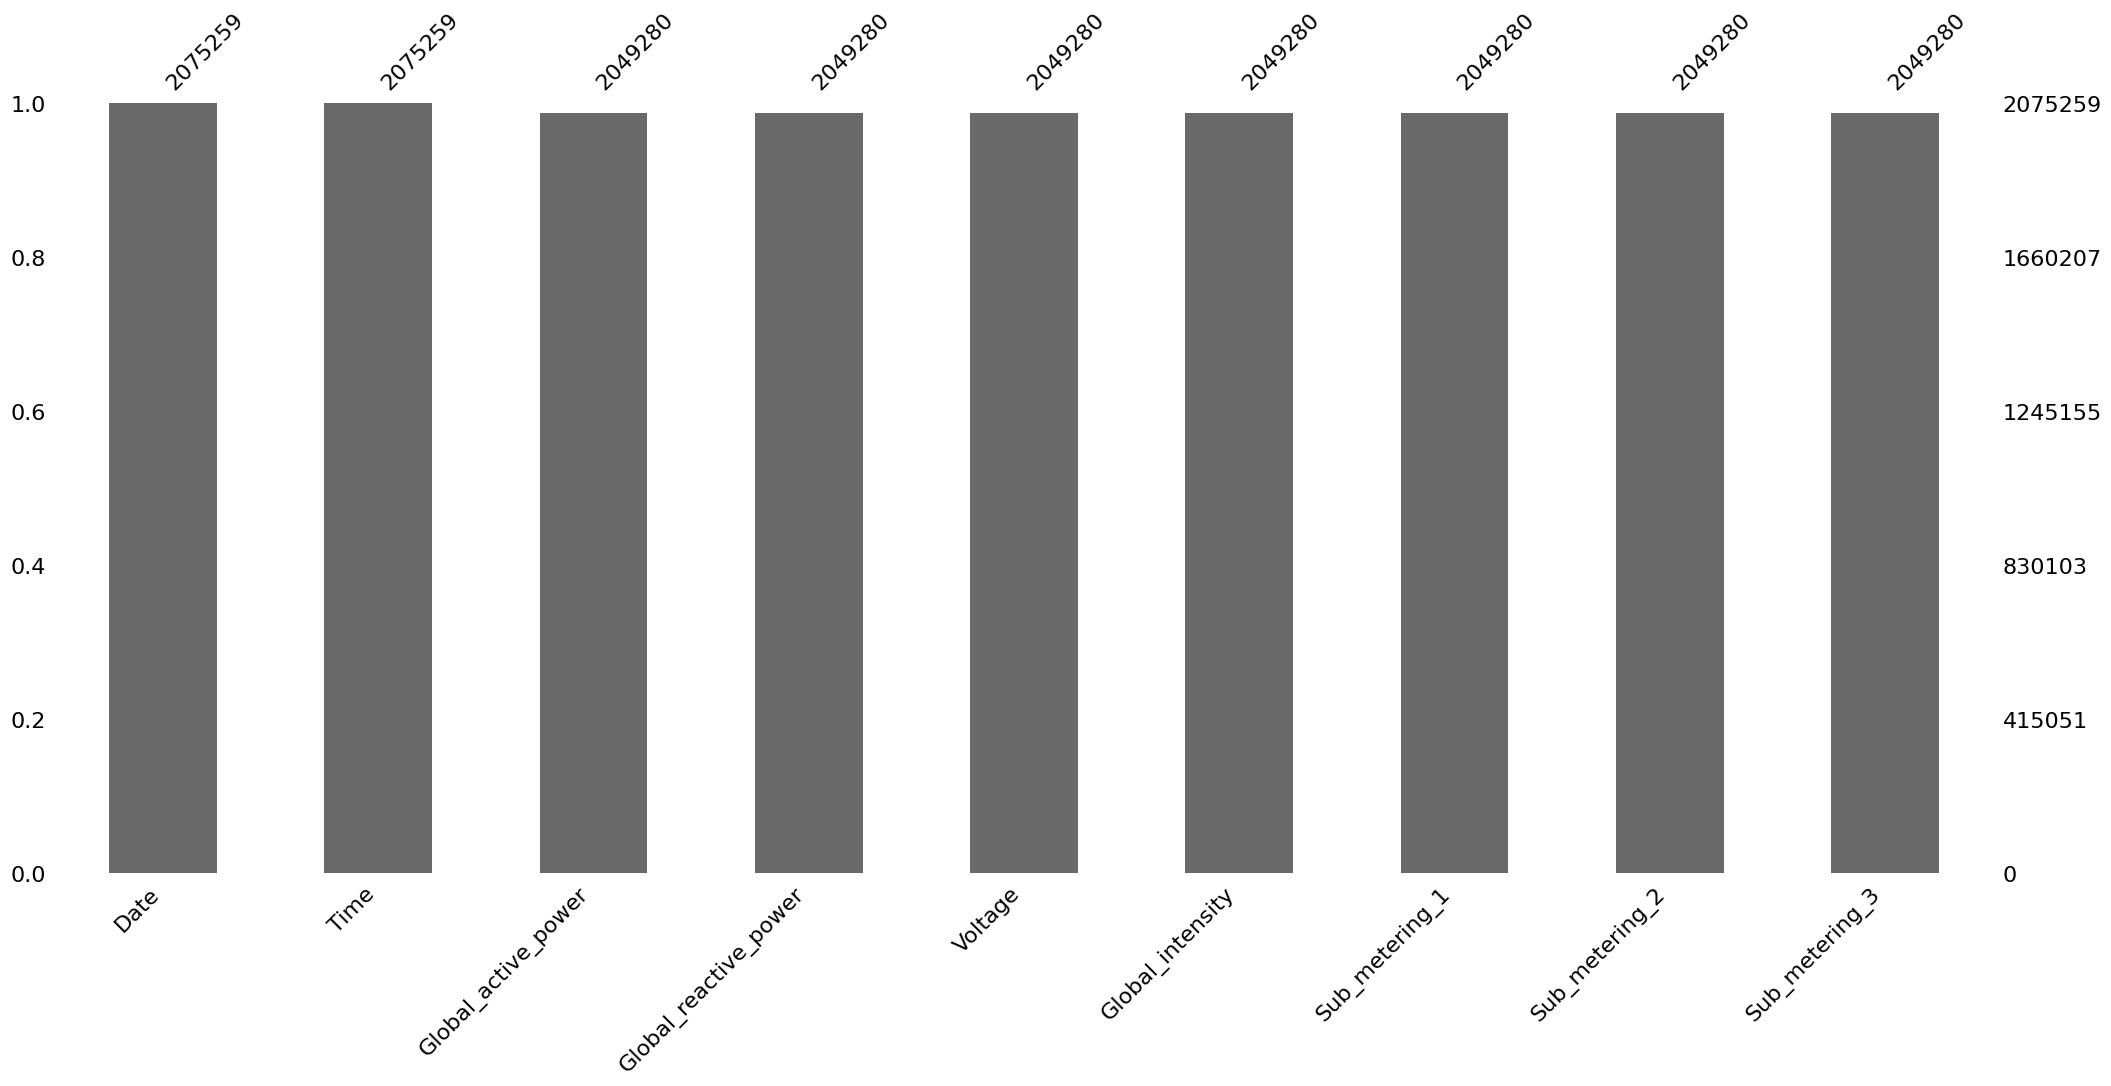

In [ ]:
mno.bar(df)

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
display(df.head())

/tmp/ipython-input-2-1082584876.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [ ]:
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime'],
      dtype='object')

In [ ]:
# prompt: convert the columns to float except the datetime column

for col in df.columns:
    if col != 'datetime':
        df[col] = pd.to_numeric(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
df.isna().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
datetime,0


In [ ]:
# prompt: set the date time column as the index and sort the index, also create the features like hour, day and year, week_end form the date time column

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month']=df.index.month
df['year'] = df.index.year
df['weekday'] = df.index.weekday
df['week_end'] = (df['weekday']>=5).astype(int)
display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,weekday,week_end
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,2006,5,1
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,2006,5,1
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,2006,5,1
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,2006,5,1
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,2006,5,1


In [ ]:
df.duplicated().sum()


np.int64(36043)

In [ ]:
df.interpolate(method='time', inplace=True)

In [ ]:
df.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
hour,0
day,0
year,0


In [ ]:

# Resample to hourly frequency, taking the mean of the values within each hour
df_hourly = df.resample('H').mean()

df_hourly.isna().sum()

/tmp/ipython-input-6-1303669202.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
hour,0
day,0
month,0


In [ ]:
df.duplicated().sum()


np.int64(10566)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
# Set float display to normal format
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Then describe your data
(df.describe())


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,weekday,week_end
count,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000,277092.0000
mean,1.2197,0.1249,239.3199,5.2020,1.3077,1.7041,5.8992,11.5153,16.0645,4.1436,2006.9208,2.9878,0.2857
std,1.2184,0.1119,3.6920,5.1481,6.6567,6.7904,8.2161,6.9253,8.6895,2.8197,0.2700,2.0079,0.4518
min,0.0820,0.0000,223.4900,0.4000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,2006.0000,0.0000,0.0000
25%,0.3020,0.0460,236.6100,1.4000,0.0000,0.0000,0.0000,6.0000,9.0000,2.0000,2007.0000,1.0000,0.0000
50%,0.6380,0.1060,239.6700,2.8000,0.0000,0.0000,0.0000,12.0000,17.0000,4.0000,2007.0000,3.0000,0.0000
75%,1.7120,0.1940,241.9700,7.2000,0.0000,1.0000,17.0000,18.0000,23.0000,5.0000,2007.0000,5.0000,1.0000
max,10.6700,1.1480,251.7000,46.4000,78.0000,78.0000,20.0000,23.0000,31.0000,12.0000,2007.0000,6.0000,1.0000


In [ ]:
(df['Sub_metering_1']>50).value_counts()

,count
Sub_metering_1,
False,2063558
True,1135


In [ ]:
# # prompt: perfrom the uni variate analysis of the each column, i want the box plot, histogram and kurtosis and skweness of the each column, except, day, hour, year, weekday, week end

# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of columns to exclude from univariate analysis
# exclude_cols = ['day', 'hour', 'year', 'weekday', 'week_end']

# # Perform univariate analysis for each column
# for col in df.columns:
#     if col not in exclude_cols and col != 'datetime':
#         print(f"Analysis for column: {col}")

#         # Box plot
#         plt.figure(figsize=(8, 4))
#         sns.boxplot(x=df[col])
#         plt.title(f'Box Plot of {col}')
#         plt.show()

#         # Histogram
#         plt.figure(figsize=(8, 4))
#         sns.histplot(df[col], kde=True)
#         plt.title(f'Histogram of {col}')
#         plt.show()

#         # Kurtosis and Skewness
#         print(f"Kurtosis of {col}: {df[col].kurtosis()}")
#         print(f"Skewness of {col}: {df[col].skew()}")
#         print("-" * 30)


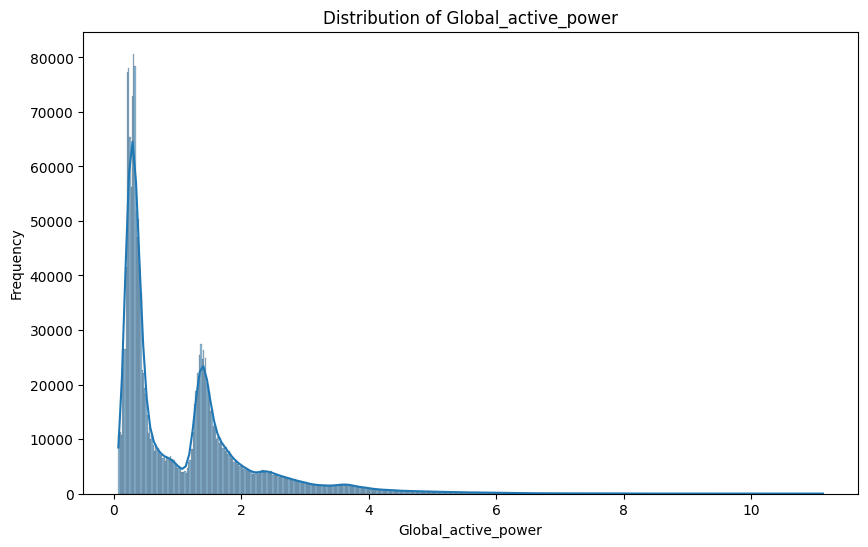

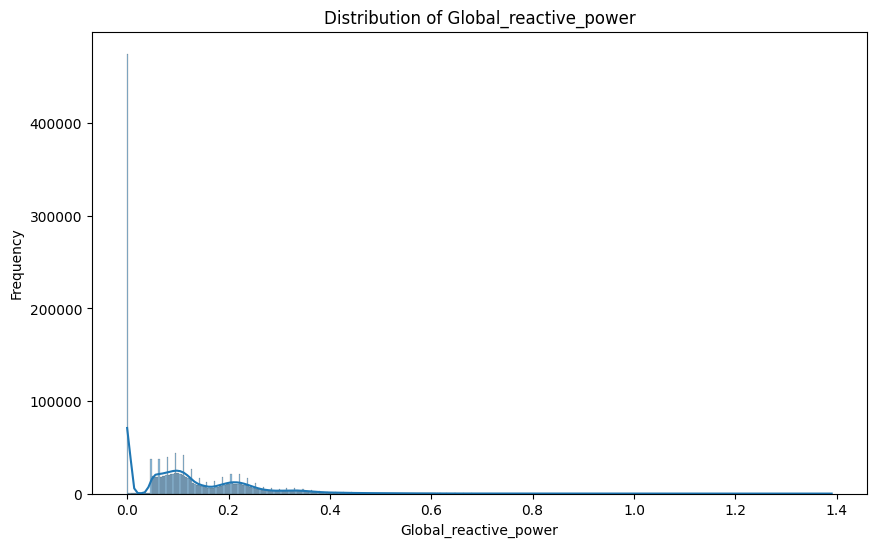

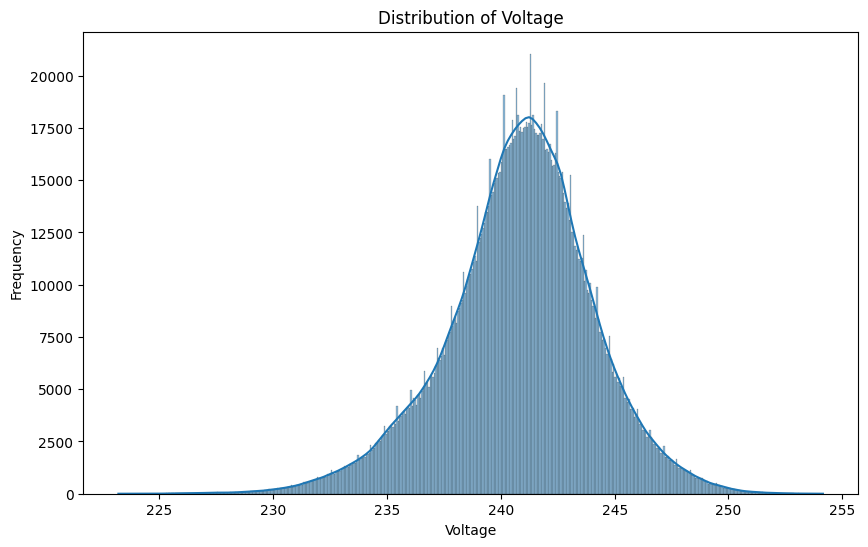

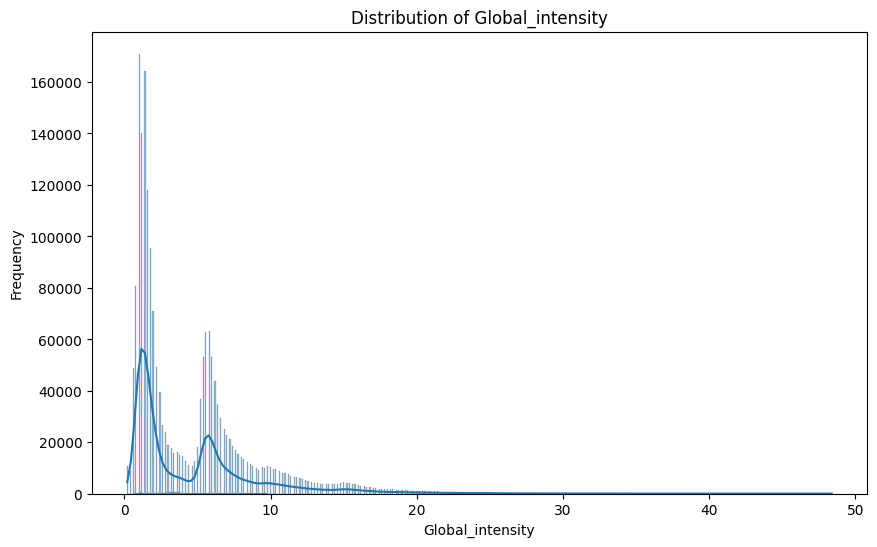

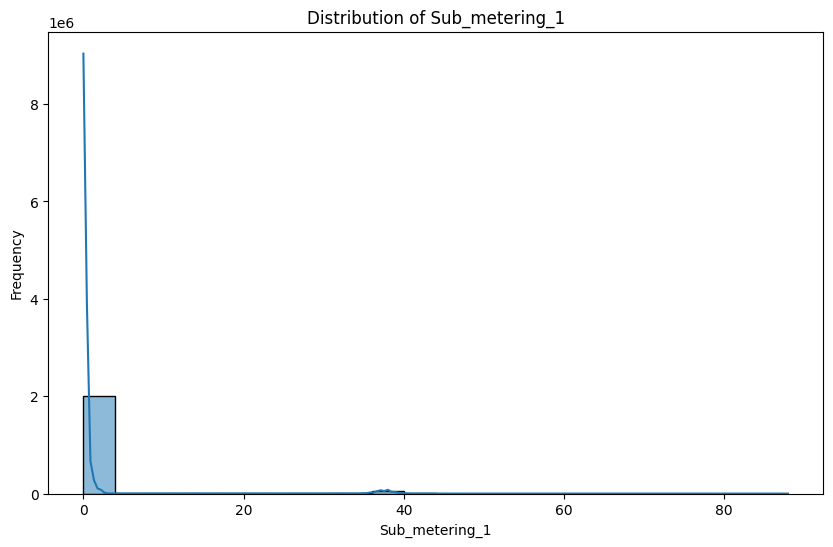

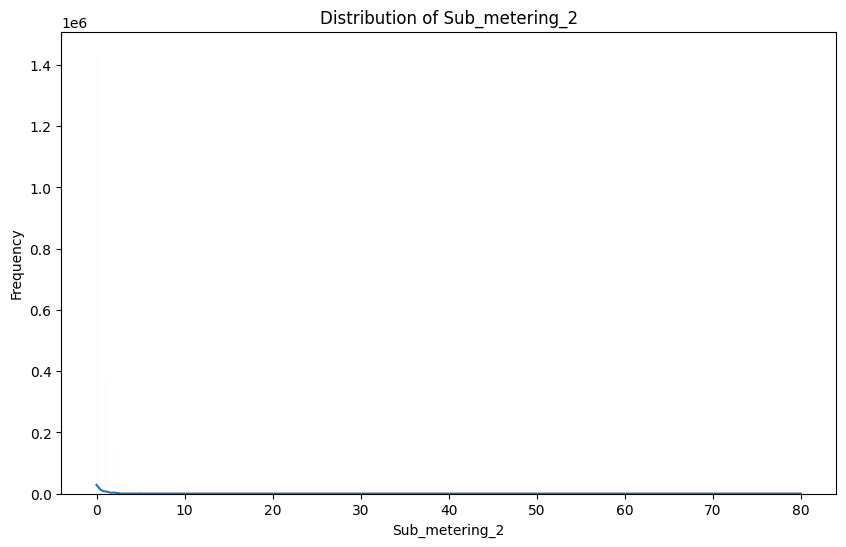

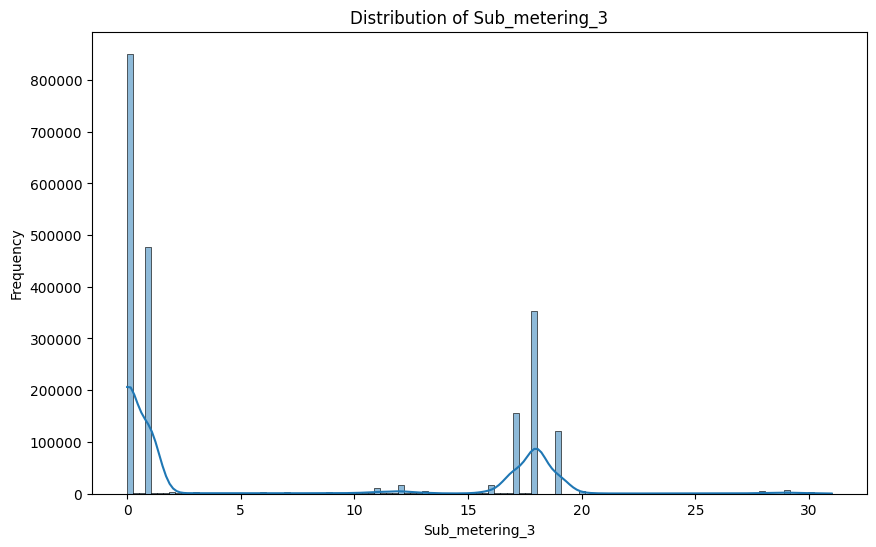

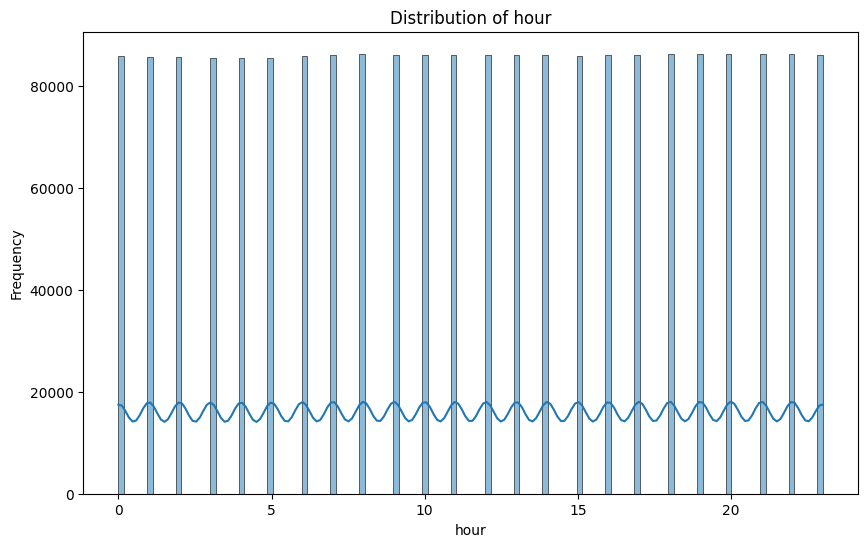

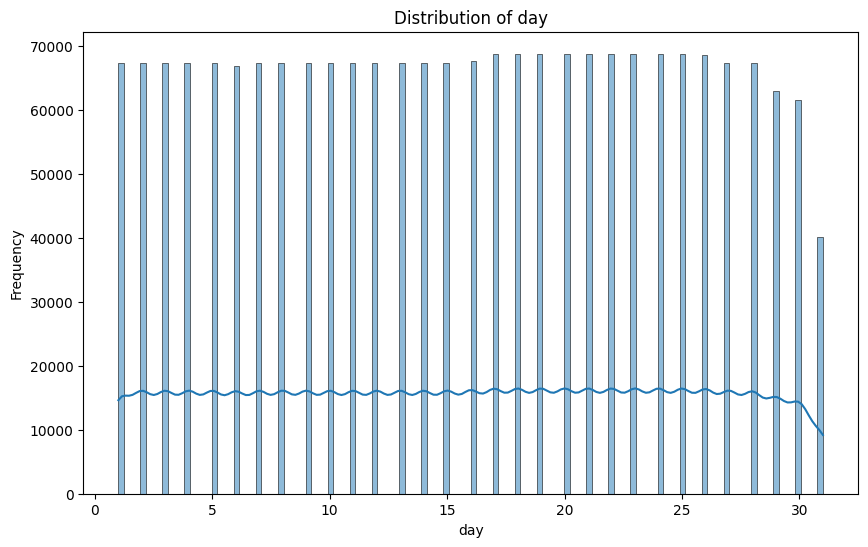

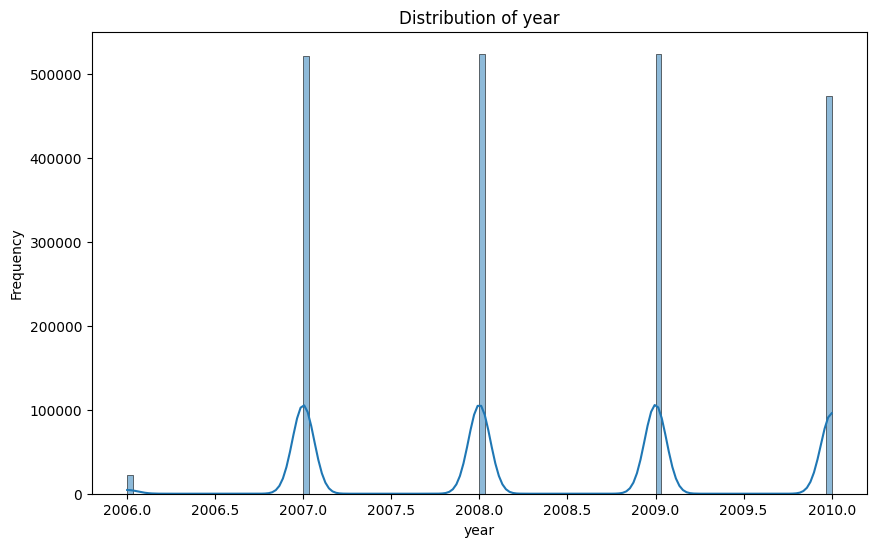

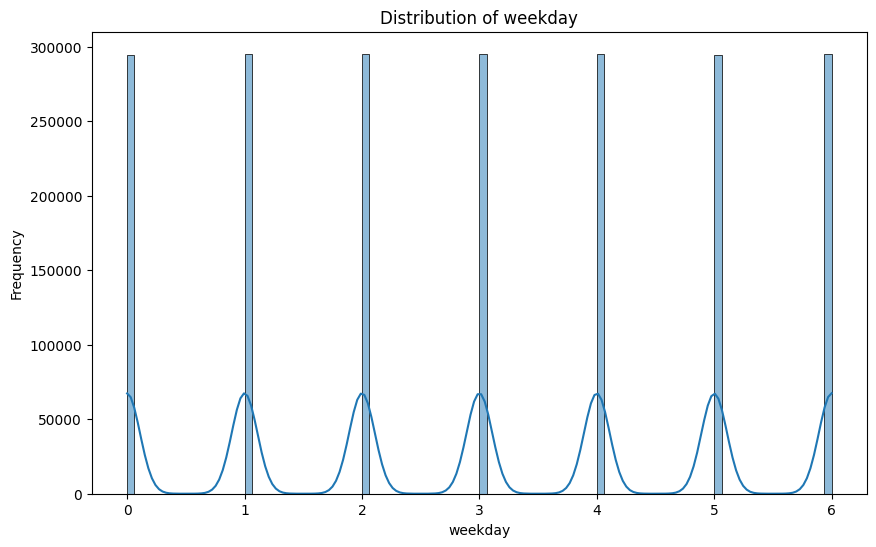

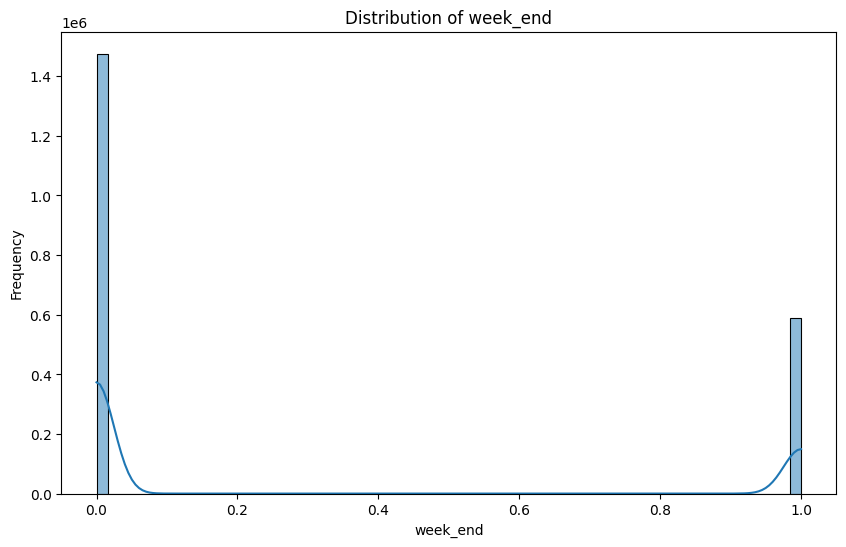

In [ ]:
# # prompt: write the code for univariate analysis to see the distribution of each column

# import matplotlib.pyplot as plt
# import seaborn as sns

# for col in df.columns:
#   if col != 'datetime':
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day', 'year', 'weekday', 'week_end'],
      dtype='object')

In [ ]:
df.drop('Global_reactive_power',inplace=True,axis=1)

In [ ]:
# prompt: create one feature name peak hour let assume peak hour is morning 6 to 9 and evening 6 to 10

df['peak_hour'] = ((df['hour'] >= 6) & (df['hour'] <= 9)) | ((df['hour'] >= 18) & (df['hour'] <= 22))
df['peak_hour'] = df['peak_hour'].astype(int)
display(df.head())

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,weekday,week_end,peak_hour
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.2160,234.8400,18.4000,0.0000,1.0000,17.0000,17,16,12,2006,5,1,0
2006-12-16 17:25:00,5.3600,233.6300,23.0000,0.0000,1.0000,16.0000,17,16,12,2006,5,1,0
2006-12-16 17:26:00,5.3740,233.2900,23.0000,0.0000,2.0000,17.0000,17,16,12,2006,5,1,0
2006-12-16 17:27:00,5.3880,233.7400,23.0000,0.0000,1.0000,17.0000,17,16,12,2006,5,1,0
2006-12-16 17:28:00,3.6660,235.6800,15.8000,0.0000,1.0000,17.0000,17,16,12,2006,5,1,0


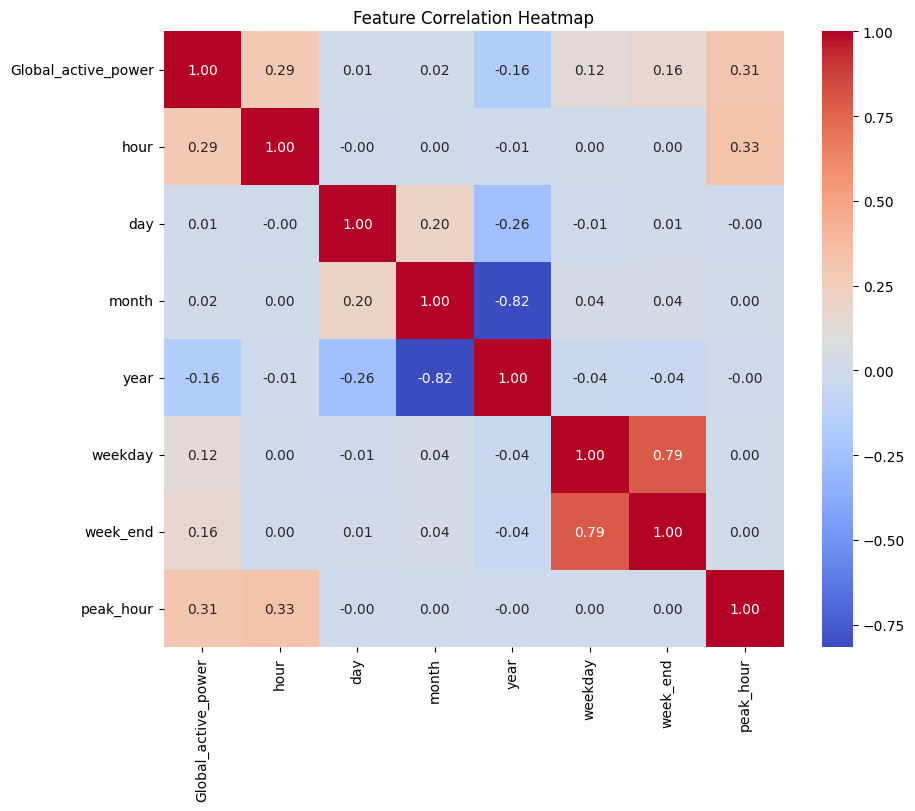

In [ ]:
# prompt: make a heatmap for choosing the features

import seaborn as sns
import matplotlib.pyplot as plt
alt_df=df.drop(['Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)
# Calculate the correlation matrix
corr_matrix = alt_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

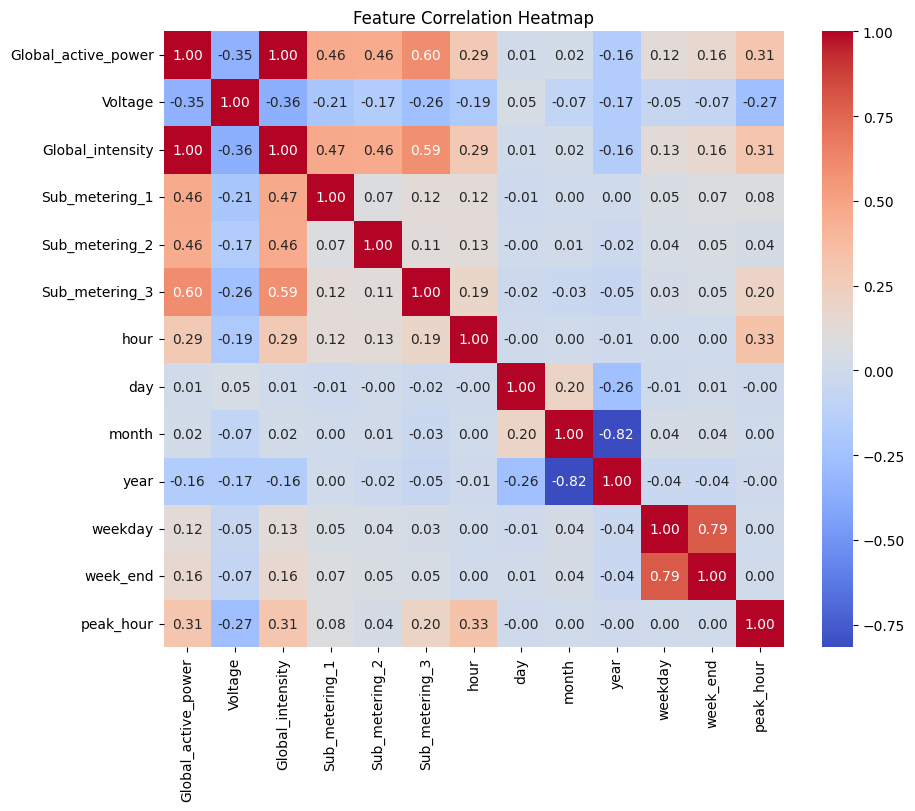

In [ ]:
# prompt: make a heatmap for choosing the features

import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ['Voltage', 'Global_intensity','Sub_metering_1',
            'Sub_metering_2', 'Sub_metering_3',
            'hour', 'day','month', 'year','peak_hour']
target = 'Global_active_power'

X = df[features]
y = df[target]

# K-Fold config
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model
    model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store scores
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

# Final results
print("🔹 Average Train MSE:", np.mean(train_mse_list))
print("🔹 Average Test MSE:", np.mean(test_mse_list))
print("✅ Average Train R²:", np.mean(train_r2_list))
print("✅ Average Test R²:", np.mean(test_r2_list))


🔹 Average Train MSE: 0.03326074278326798
🔹 Average Test MSE: 0.03329043279394088
✅ Average Train R²: 0.9775956689201335
✅ Average Test R²: 0.9775771283417901


In [ ]:
import pandas as pd

# Show feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


,Feature,Importance
1,Global_intensity,1.0000
0,Voltage,0.0000
2,Sub_metering_1,0.0000
3,Sub_metering_2,0.0000
4,Sub_metering_3,0.0000
5,hour,0.0000
6,day,0.0000
7,month,0.0000
8,year,0.0000
9,peak_hour,0.0000


In [ ]:
# prompt: save the trainined model in pickle file

import pickle

filename = 'Power_prediction_model.pkl'
pickle.dump(model, open(filename, 'wb'))

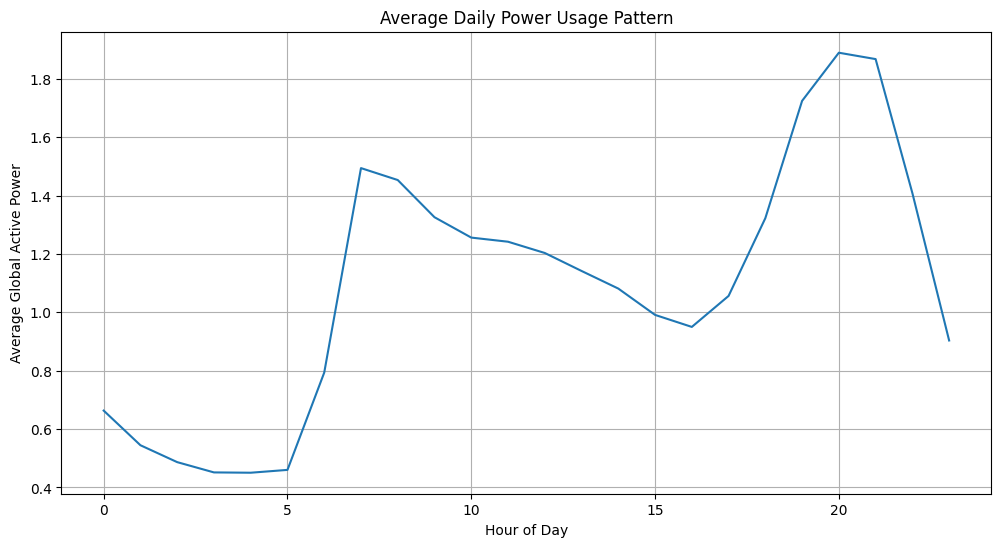

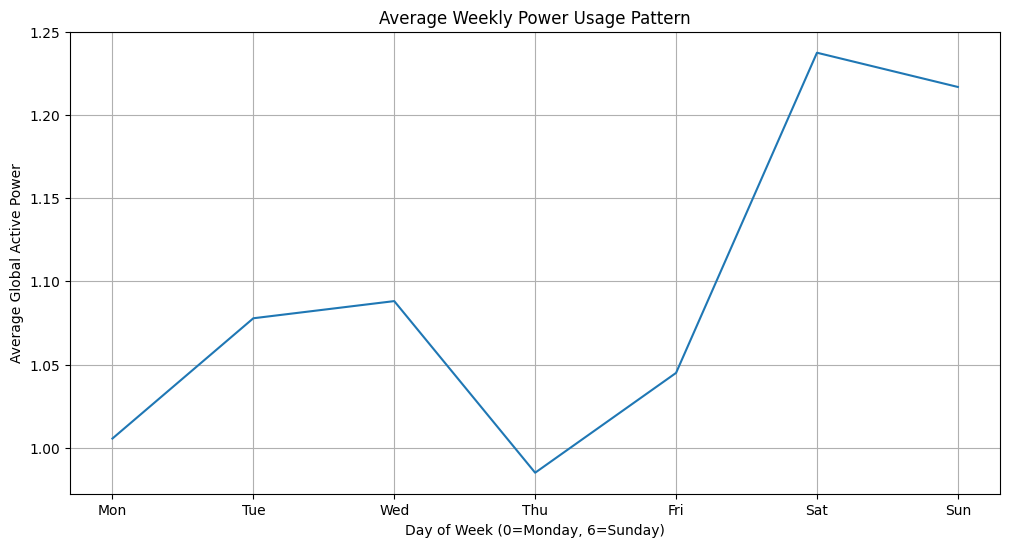

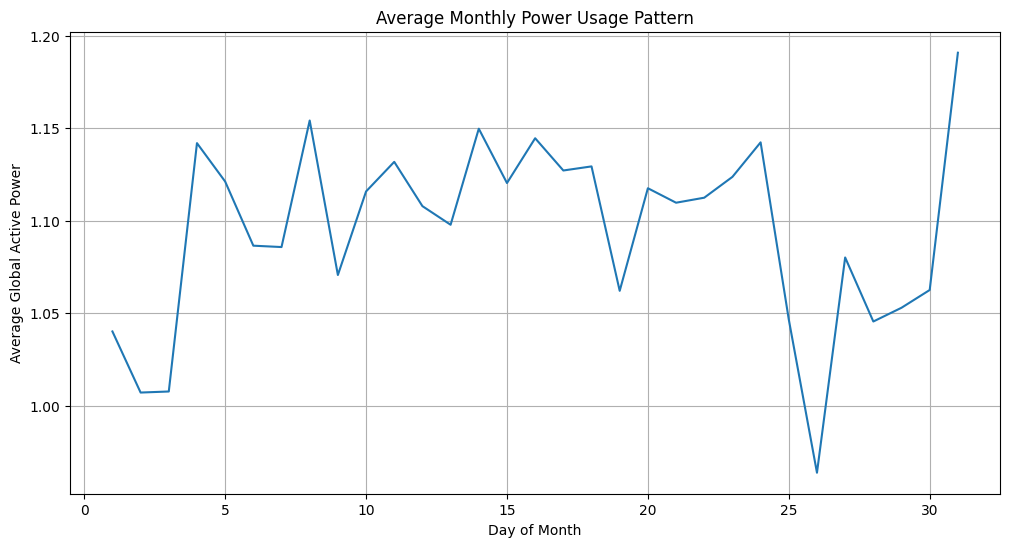

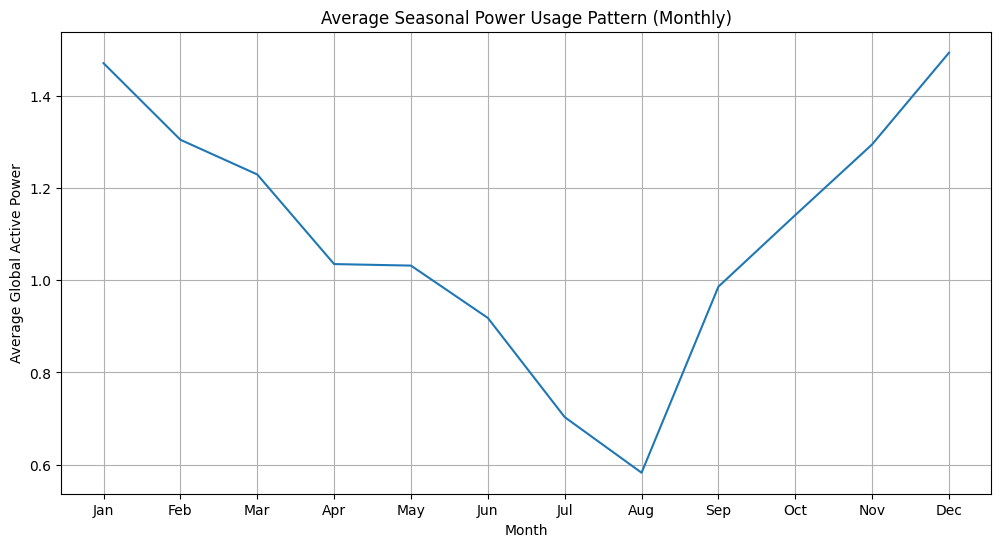

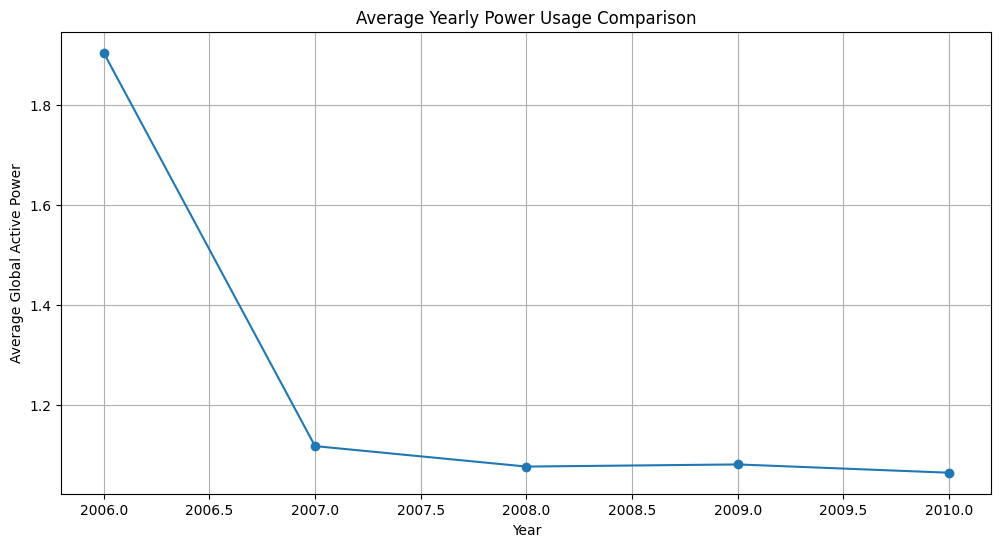

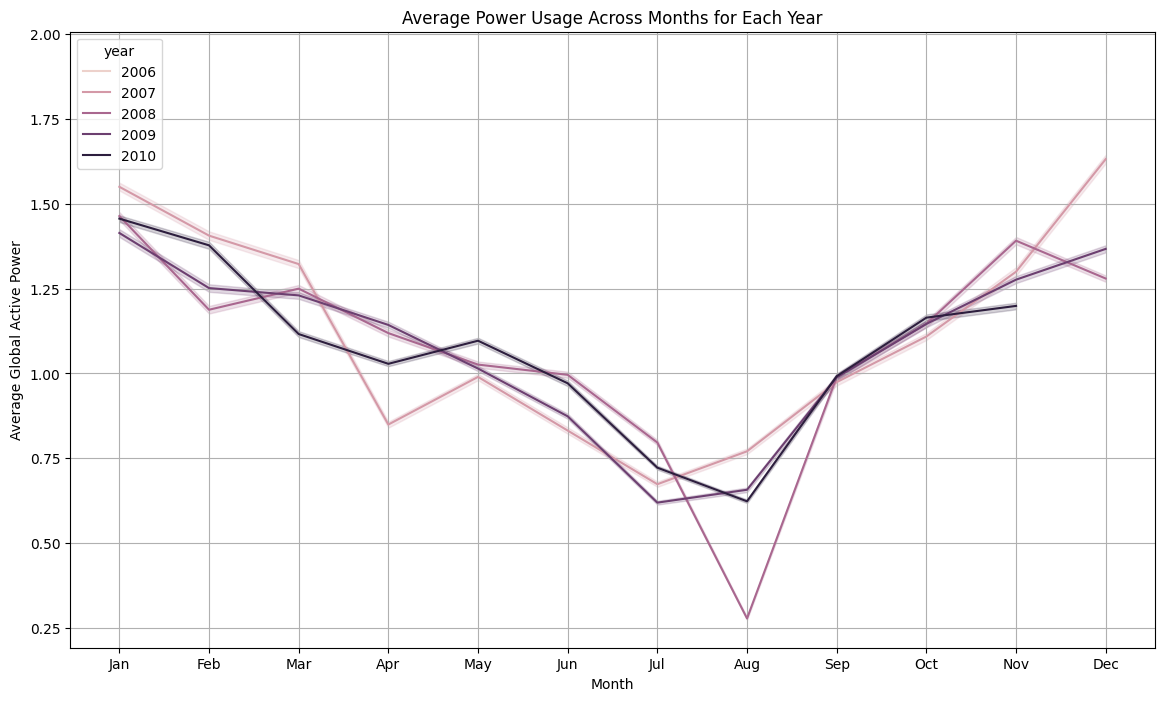

In [ ]:
# prompt: Generate the code for find the pattern in the data, like the daily usage pattern with line plot, weekly usage pattern, monthly usage pattern, seaoson usage pattern, compare the year usage pattern, compare seaoson across each year

# Daily Usage Pattern
plt.figure(figsize=(12, 6))
df_hourly.groupby('hour')['Global_active_power'].mean().plot()
plt.title('Average Daily Power Usage Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power')
plt.grid(True)
plt.show()

# Weekly Usage Pattern
plt.figure(figsize=(12, 6))
df.groupby('weekday')['Global_active_power'].mean().plot()
plt.title('Average Weekly Power Usage Pattern')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Global Active Power')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Monthly Usage Pattern
# Resample to daily frequency to get daily averages
df_daily = df.resample('D').mean()
df_daily['day_of_month'] = df_daily.index.day
plt.figure(figsize=(12, 6))
df_daily.groupby('day_of_month')['Global_active_power'].mean().plot()
plt.title('Average Monthly Power Usage Pattern')
plt.xlabel('Day of Month')
plt.ylabel('Average Global Active Power')
plt.grid(True)
plt.show()

# Seasonal Usage Pattern (assuming month as season for simplicity)
df['month'] = df.index.month
plt.figure(figsize=(12, 6))
df.groupby('month')['Global_active_power'].mean().plot()
plt.title('Average Seasonal Power Usage Pattern (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Compare Year Usage Pattern
plt.figure(figsize=(12, 6))
df.groupby('year')['Global_active_power'].mean().plot(marker='o')
plt.title('Average Yearly Power Usage Comparison')
plt.xlabel('Year')
plt.ylabel('Average Global Active Power')
plt.grid(True)
plt.show()

# Compare Season Across Each Year (using month as season)
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='month', y='Global_active_power', hue='year')
plt.title('Average Power Usage Across Months for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,year,weekday,week_end,month,peak_hour
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.2160,234.8400,18.4000,0.0000,1.0000,17.0000,17,16,2006,5,1,12,0
2006-12-16 17:25:00,5.3600,233.6300,23.0000,0.0000,1.0000,16.0000,17,16,2006,5,1,12,0
2006-12-16 17:26:00,5.3740,233.2900,23.0000,0.0000,2.0000,17.0000,17,16,2006,5,1,12,0
2006-12-16 17:27:00,5.3880,233.7400,23.0000,0.0000,1.0000,17.0000,17,16,2006,5,1,12,0
2006-12-16 17:28:00,3.6660,235.6800,15.8000,0.0000,1.0000,17.0000,17,16,2006,5,1,12,0


Average Submeter Consumption during Peak Hours:


,Sub_metering_1,Sub_metering_2,Sub_metering_3
hour,,,
6,0.0404,0.3382,4.2667
7,0.3032,0.5044,10.6866
8,1.3577,1.0057,12.5588
9,1.4595,1.0754,12.4454
18,1.3081,1.7866,5.7683
19,2.5837,2.1005,6.7433
20,2.7547,1.8938,8.4181
21,2.7975,1.7699,7.6111
22,2.2112,1.1643,5.7119



Submeter with Highest Consumption during Peak Hours (by Hour):


,0
hour,
6,Sub_metering_3
7,Sub_metering_3
8,Sub_metering_3
9,Sub_metering_3
18,Sub_metering_3
19,Sub_metering_3
20,Sub_metering_3
21,Sub_metering_3
22,Sub_metering_3



Overall Average Submeter Consumption during Peak Hours:


,0
Sub_metering_1,1.6472
Sub_metering_2,1.2939
Sub_metering_3,8.2462



Submeter with the highest overall consumption during peak hours: Sub_metering_3


<Figure size 1200x600 with 0 Axes>

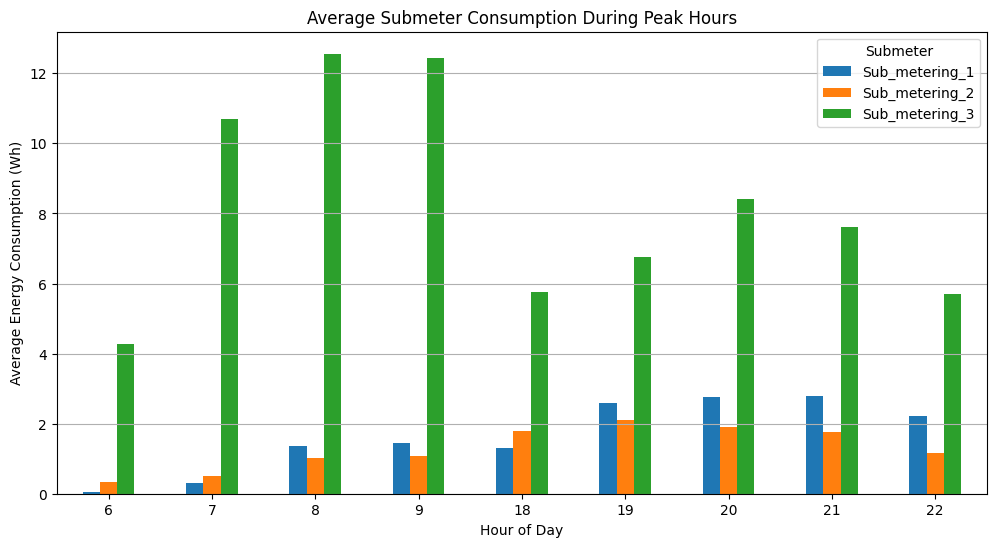

In [ ]:
# prompt: now explore the peak hour, which submeter consume high power on peak hour

# Analyze submeter usage during peak hours
peak_hour_df = df[df['peak_hour'] == 1]

# Group by hour and find the average consumption for each submeter
submeter_peak_consumption = peak_hour_df.groupby('hour')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

print("Average Submeter Consumption during Peak Hours:")
display(submeter_peak_consumption)

# Find the submeter with the highest average consumption during peak hours for each hour
peak_submeter_per_hour = submeter_peak_consumption.idxmax(axis=1)
print("\nSubmeter with Highest Consumption during Peak Hours (by Hour):")
display(peak_submeter_per_hour)

# Overall average consumption of each submeter during all peak hours
overall_peak_submeter_consumption = peak_hour_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
print("\nOverall Average Submeter Consumption during Peak Hours:")
display(overall_peak_submeter_consumption)

# Submeter with the highest overall average consumption during peak hours
highest_overall_peak_submeter = overall_peak_submeter_consumption.idxmax()
print(f"\nSubmeter with the highest overall consumption during peak hours: {highest_overall_peak_submeter}")

# Visualize the submeter consumption during peak hours
plt.figure(figsize=(12, 6))
submeter_peak_consumption.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Average Submeter Consumption During Peak Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (Wh)')
plt.xticks(rotation=0)
plt.legend(title='Submeter')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

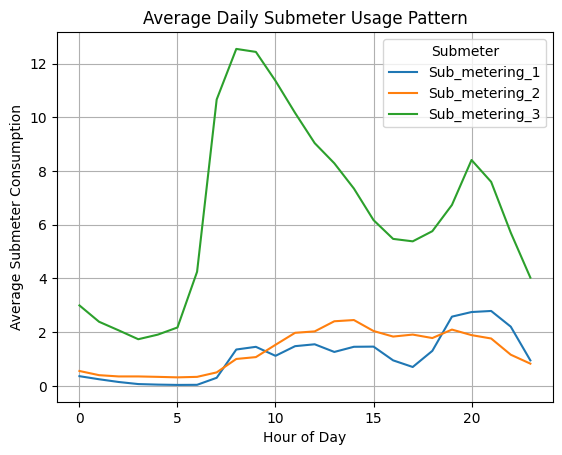

<Figure size 1200x600 with 0 Axes>

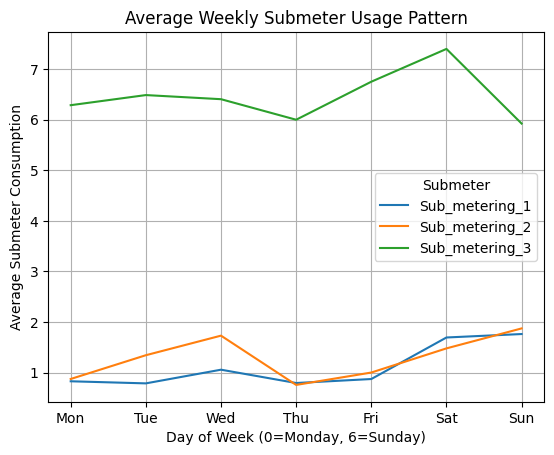

<Figure size 1200x600 with 0 Axes>

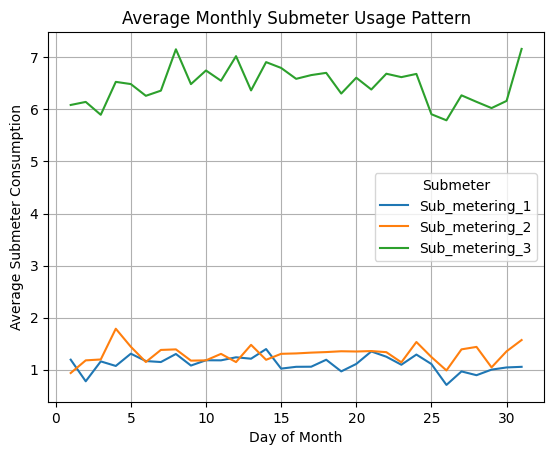

<Figure size 1200x600 with 0 Axes>

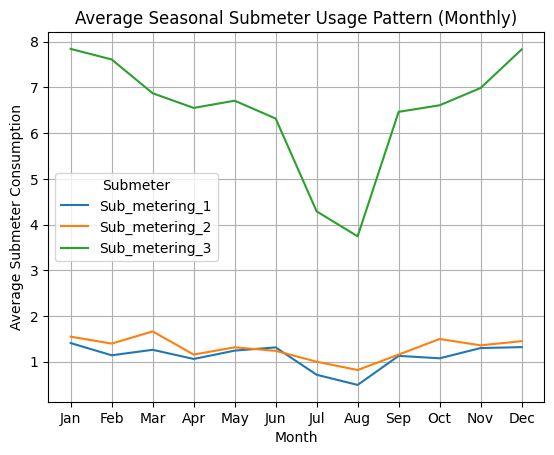

<Figure size 1200x600 with 0 Axes>

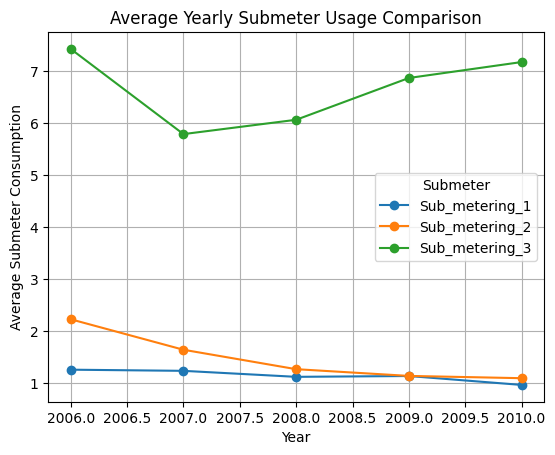

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

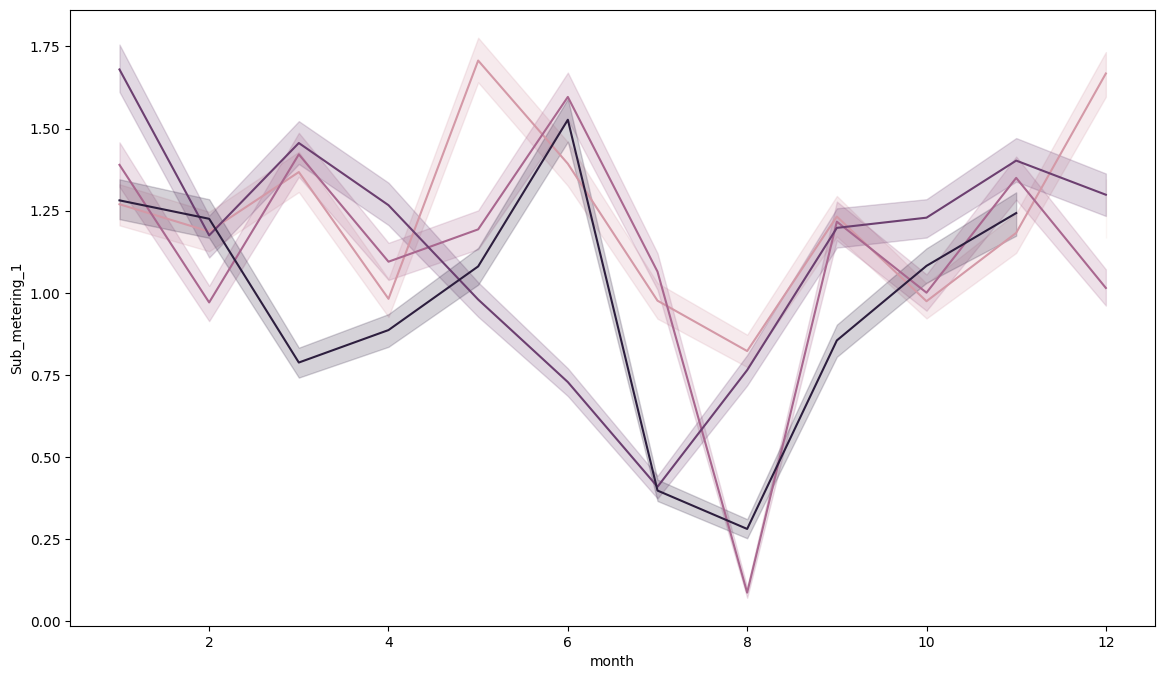

In [ ]:
# prompt: now generate the code like we did for power consumption, now we want to eplore the all three submters

# Daily Usage Pattern for Submeters
plt.figure(figsize=(12, 6))
df_hourly.groupby('hour')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot()
plt.title('Average Daily Submeter Usage Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Submeter Consumption')
plt.grid(True)
plt.legend(title='Submeter')
plt.show()

# Weekly Usage Pattern for Submeters
plt.figure(figsize=(12, 6))
df.groupby('weekday')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot()
plt.title('Average Weekly Submeter Usage Pattern')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Submeter Consumption')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend(title='Submeter')
plt.show()

# Monthly Usage Pattern for Submeters
plt.figure(figsize=(12, 6))
df_daily.groupby('day_of_month')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot()
plt.title('Average Monthly Submeter Usage Pattern')
plt.xlabel('Day of Month')
plt.ylabel('Average Submeter Consumption')
plt.grid(True)
plt.legend(title='Submeter')
plt.show()

# Seasonal Usage Pattern (assuming month as season for simplicity) for Submeters
plt.figure(figsize=(12, 6))
df.groupby('month')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot()
plt.title('Average Seasonal Submeter Usage Pattern (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Submeter Consumption')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Submeter')
plt.show()

# Compare Year Usage Pattern for Submeters
plt.figure(figsize=(12, 6))
df.groupby('year')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean().plot(marker='o')
plt.title('Average Yearly Submeter Usage Comparison')
plt.xlabel('Year')
plt.ylabel('Average Submeter Consumption')
plt.grid(True)
plt.legend(title='Submeter')
plt.show()

# Compare Season Across Each Year (using month as season) for Submeters
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='month', y='Sub_metering_1', hue='year', label='Sub_metering_1')
sns.lineplot(data=df, x='month', y='Sub_metering_2', hue='year', label='Sub_metering_2')
sns.lineplot(data=df, x='month', y='Sub_metering_3', hue='year', label='Sub_metering_3')
plt.title('Average Submeter Usage Across Months for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Submeter Consumption')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Submeter and Year')
plt.show()

Seasonal Power Consumption Comparison Across Years:


year,2006,2007,2008,2009,2010
month,,,,,
1,NaN,1.5500,1.4638,1.4140,1.4563
2,NaN,1.4062,1.1878,1.2516,1.3776
3,NaN,1.3224,1.2500,1.2301,1.1162
4,NaN,0.8496,1.1190,1.1430,1.0285
5,NaN,0.9899,1.0262,1.0146,1.0966
6,NaN,0.8318,0.9961,0.8738,0.9711
7,NaN,0.6738,0.7965,0.6195,0.7225
8,NaN,0.7708,0.2782,0.6574,0.6234
9,NaN,0.9745,0.9898,0.9884,0.9920


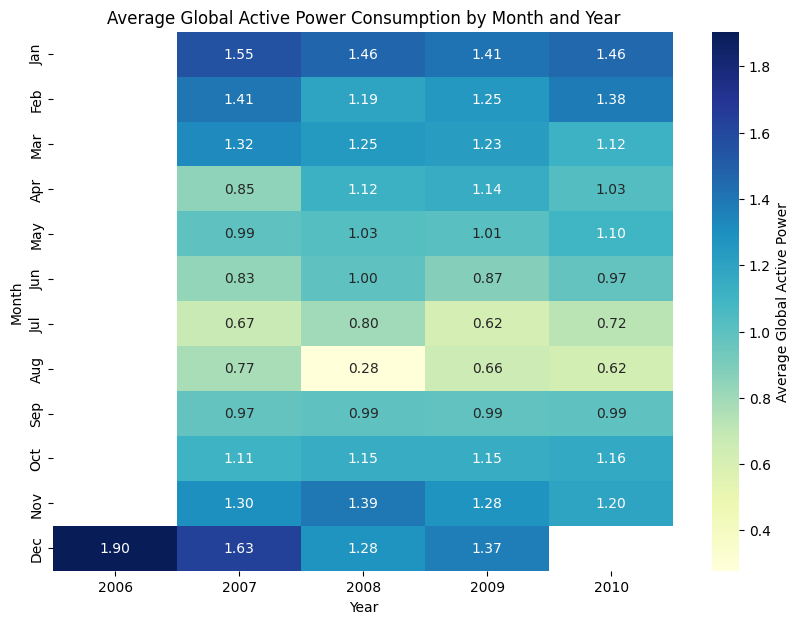

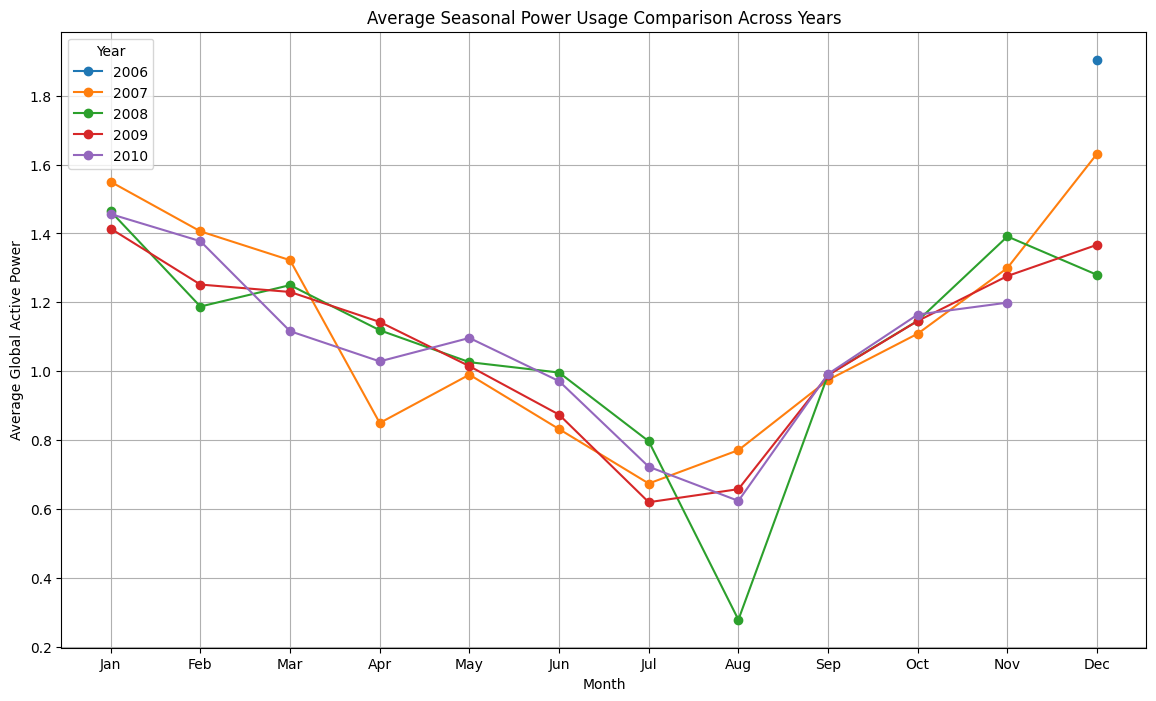

In [ ]:
# prompt: now compare the sesonal pattern in power consumption, example summer in 2008 vs 2010 like that compare the all the seaon and years

# Group by year and month to get average power consumption per season and year
seasonal_yearly_consumption = df.groupby(['year', 'month'])['Global_active_power'].mean().reset_index()

# Pivot the table to have years as columns and months as rows
seasonal_yearly_pivot = seasonal_yearly_consumption.pivot(index='month', columns='year', values='Global_active_power')

print("Seasonal Power Consumption Comparison Across Years:")
display(seasonal_yearly_pivot)

# Visualize the comparison using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(seasonal_yearly_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Global Active Power'})
plt.title('Average Global Active Power Consumption by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=np.arange(12) + 0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Alternatively, plot line plots for each year on the same graph
plt.figure(figsize=(14, 8))
for year in seasonal_yearly_pivot.columns:
    plt.plot(seasonal_yearly_pivot.index, seasonal_yearly_pivot[year], marker='o', label=year)

plt.title('Average Seasonal Power Usage Comparison Across Years')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()